# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

Let's generate our dataset and take a look on it.

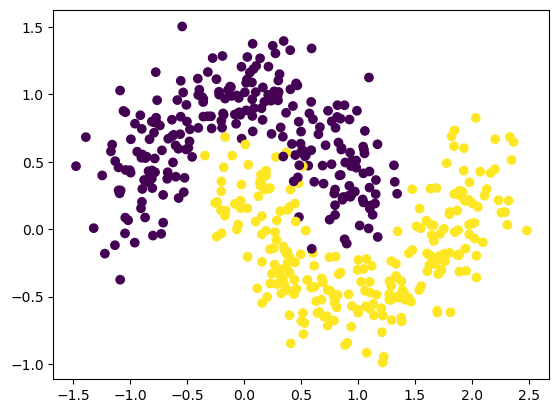

In [71]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

# Зарезервирую X_train, y_train и буду пользоваться в дальнейшем:
X_train, y_train = moons_points, moons_labels

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [72]:
pip install mlxtend

Logistion Regression accuracy: 0.86
SVM accuracy: 0.862


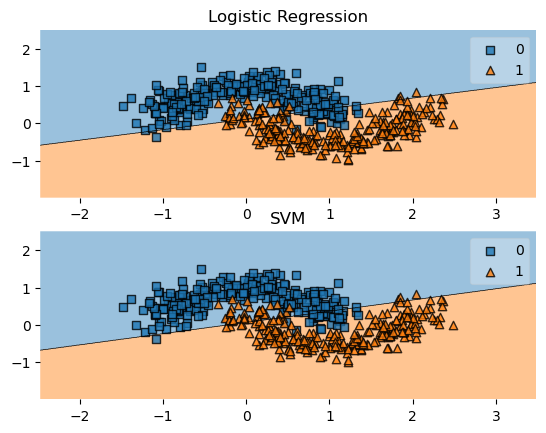

In [73]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")


lr = LogisticRegression(solver = 'saga', max_iter = 1000, C = 3)  # add some params
svm = SVC(kernel = "linear", max_iter = 1000, C = 3)  # here too

### YOUR CODE HERE
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

plt.subplot(2, 1, 1)
plot_decision_regions(X_train, y_train, lr)
plt.title("Logistic Regression")
print(f'Logistion Regression accuracy: {accuracy_score(y_train, lr.predict(X_train))}')
plt.subplot(2, 1, 2)
plot_decision_regions(X_train, y_train, svm)
plt.title("SVM")
print(f'SVM accuracy: {accuracy_score(y_train, svm.predict(X_train))}')
plt.show()

LogisticRegrestion и SVM пытаются разделить данные на 2 равных класса, т.е. у них не получается описать распределение данных из датасета.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [ ]:
### YOUR CODE HERE

# POLY 
svm = SVC(kernel='poly', C = 3, degree = 8, coef0 = 20)
svm.fit(X_train, y_train)
plt.subplot(3, 1, 1)
plot_decision_regions(X_train, y_train, svm)
plt.title("SVM -> POLY")
print(f'SVM -> POLY accuracy: {accuracy_score(y_train, svm.predict(X_train))}')

# RBF
svm = SVC(kernel='rbf', C = 3)
svm.fit(X_train, y_train)
plt.subplot(3, 1, 2)
plot_decision_regions(X_train, y_train, svm)
plt.title("SVM -> RBF")
print(f'SVM -> RBF accuracy: {accuracy_score(y_train, svm.predict(X_train))}')

# SIGMOID
svm = SVC(kernel='sigmoid', C = 1e-3)
svm.fit(X_train, y_train)
plt.subplot(3, 1, 3)
plot_decision_regions(X_train, y_train, svm)
plt.title("SVM -> SIGMOID")
print(f'SVM -> SIGMOID accuracy: {accuracy_score(y_train, svm.predict(X_train))}')

plt.show()

POLY:
С увеличением степени полинома точность возрастает при остальных фиксированных параметрах; даже может привысить точность RBF. В общем говоря, степень полинома влияет на форму разделяемой границы. 

RBF:
Хорошо обрабатывает сложные и нелинейные границы, хорошо разделяет данные. Имеет наивысшую точность среди всех вариантов.

SIGMOID:
Не очень эффективно разделяет данные. Граница разделения стремится к линейной.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

### YOUR CODE HERE
def pickDegPipe(i):
    polynomialFeatures = PolynomialFeatures(degree = i)
    polynomialFeaturesTransform = polynomialFeatures.fit_transform(X_train)
    lr = LogisticRegression(solver = 'saga', C = 100, max_iter = 1000)
    lr.fit(polynomialFeaturesTransform, y_train)
    
    return Pipeline(steps=[('Polynomial Features', polynomialFeatures), ('Logistic Regression', lr)])
    
max = -1
indexMaxDeg = -1
for i in range(1, 10, 1):
    pipe = pickDegPipe(i)
    
    if accuracy_score(y_train, pipe.predict(X_train)) >= max:
        max = accuracy_score(y_train, pipe.predict(X_train))
        indexMaxDeg = i

print(f'MAX Polymonial Features Accuracy: {max}\nDEGREE: {indexMaxDeg}')

# Возьмем степень полинома с наибольшей точностью разделения.
plt.title("PLOT DECISION REGIONS")
plot_decision_regions(X_train, y_train, pickDegPipe(indexMaxDeg))

Граница хорошо ведет себя и схожа с SVM при нечетных степенях. Также хочу отметить, что наибольшая точность получается для 3-й степени, я ее и выбрал (она еще и нечетная).

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

In [ ]:
from sklearn.datasets import make_circles


circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

In [ ]:
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))  # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

# Опять переобозначу для удобства:
X_train = points
y_train = labels

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [ ]:
### YOUR CODE HERE
lr = LogisticRegression(solver = 'saga', C = 100, max_iter = 1000)
polynomialFeatures = PolynomialFeatures(degree = 3)

plt.subplot(2, 1, 1)
pipe = Pipeline(steps=[('Polynomial Features', polynomialFeatures), ('Logistic Regression', lr)])
pipe.fit(X_train, y_train)
plt.title("Logistic Regression")
plot_decision_regions(X_train, y_train, pipe)
print(f'Logistic Regression Accuracy: {accuracy_score(y_train, pipe.predict(X_train))}')

plt.subplot(2, 1, 2)
svm = SVC(kernel = 'rbf', C = 100)
svm.fit(X_train, y_train)
plt.title("SVM with RBF Kernel")
plot_decision_regions(X_train, y_train, svm)
print(f'SVM with RBF Kernel Accuracy: {accuracy_score(y_train, svm.predict(X_train))}')

Начнем с того, что оба метода достигают высокой точности, но SVM с ядром RBF оказывается лучше, по сравнению с Logistic Regression, засчет того, что граница лучше разделяет классы.